Random Forest: 0.8177083333333334
AdaBoost: 0.8125
Gradient Boosting: 0.8177083333333334


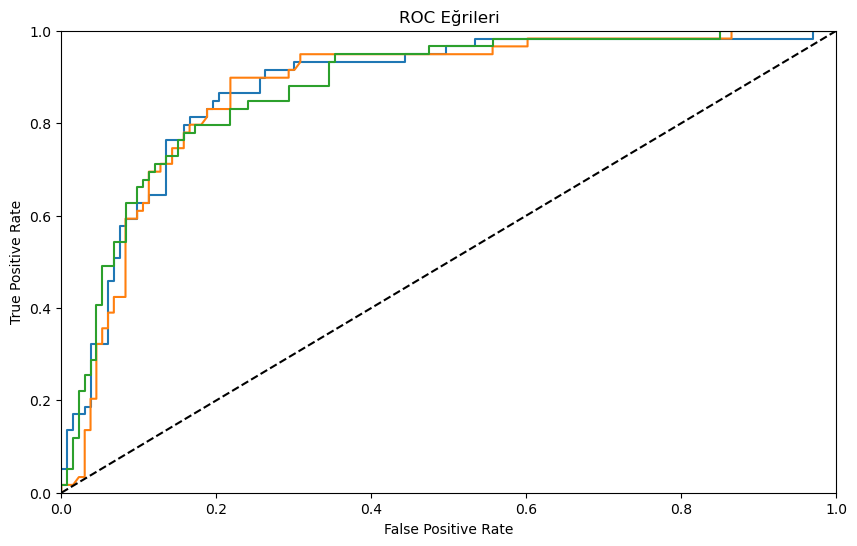

En İyi Modelin Accuracy: 0.8177083333333334


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score


df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")

# Hedef değişkeni tanımlandi
y = df["Outcome"]

#test ve train verileri
X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), y, test_size=0.25)

# Ensemble classification algoritmaları
rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
ab = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Modelleri eğit
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Modelleri değerlendir
y_pred_rf = rf.predict(X_test)
y_pred_ab = ab.predict(X_test)
y_pred_gb = gb.predict(X_test)

print("Random Forest:", accuracy_score(y_test, y_pred_rf))
print("AdaBoost:", accuracy_score(y_test, y_pred_ab))
print("Gradient Boosting:", accuracy_score(y_test, y_pred_gb))

# ROC eğrilerini çiz
plt.figure(figsize=(10, 6))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, ab.predict_proba(X_test)[:,1])
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb.predict_proba(X_test)[:,1])

plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))
plt.plot(fpr_ab, tpr_ab, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, ab.predict_proba(X_test)[:,1])))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_score(y_test, gb.predict_proba(X_test)[:,1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrileri')

plt.show()

# En iyi model
best_model = gb if accuracy_score(y_test, y_pred_gb) > accuracy_score(y_test, y_pred_rf) and accuracy_score(y_test, y_pred_gb) > accuracy_score(y_test, y_pred_ab) else rf if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_ab) else ab

# Modeli test et
y_pred = best_model.predict(X_test)

print("En İyi Modelin Accuracy:", accuracy_score(y_test, y_pred))


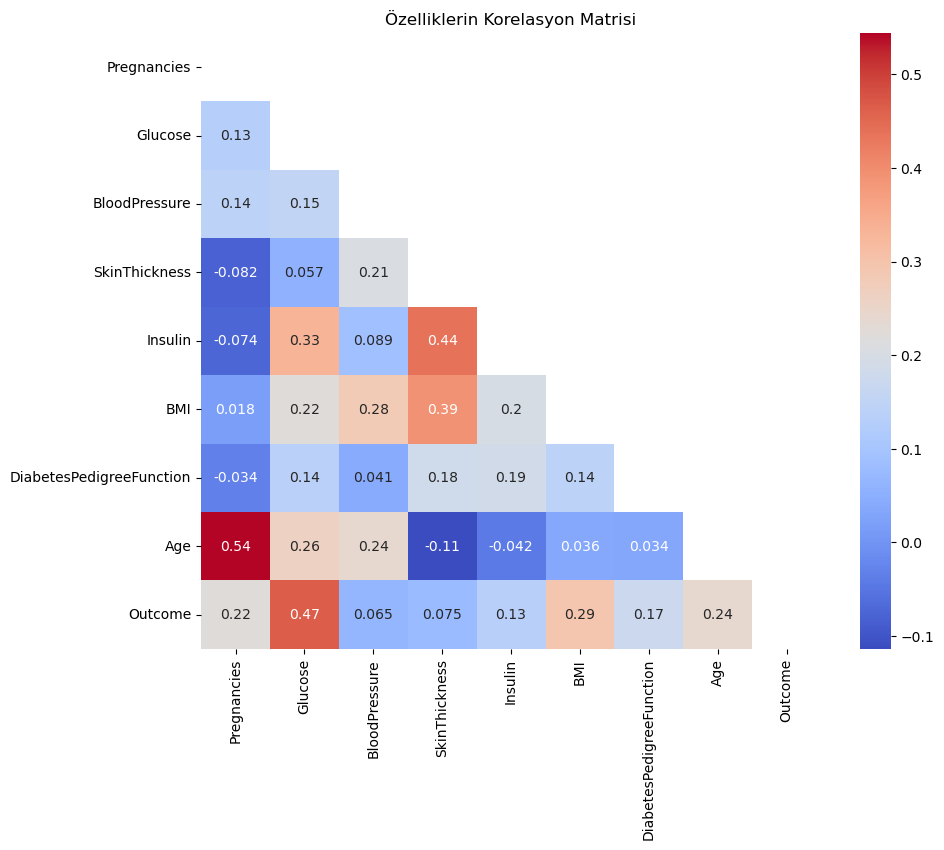

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


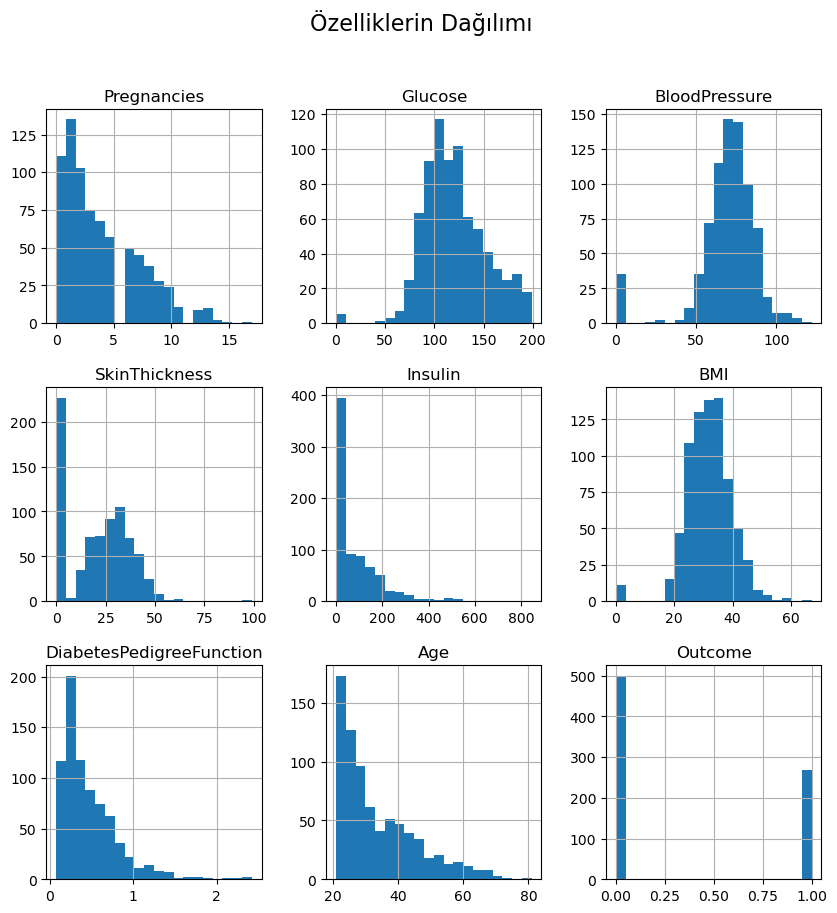

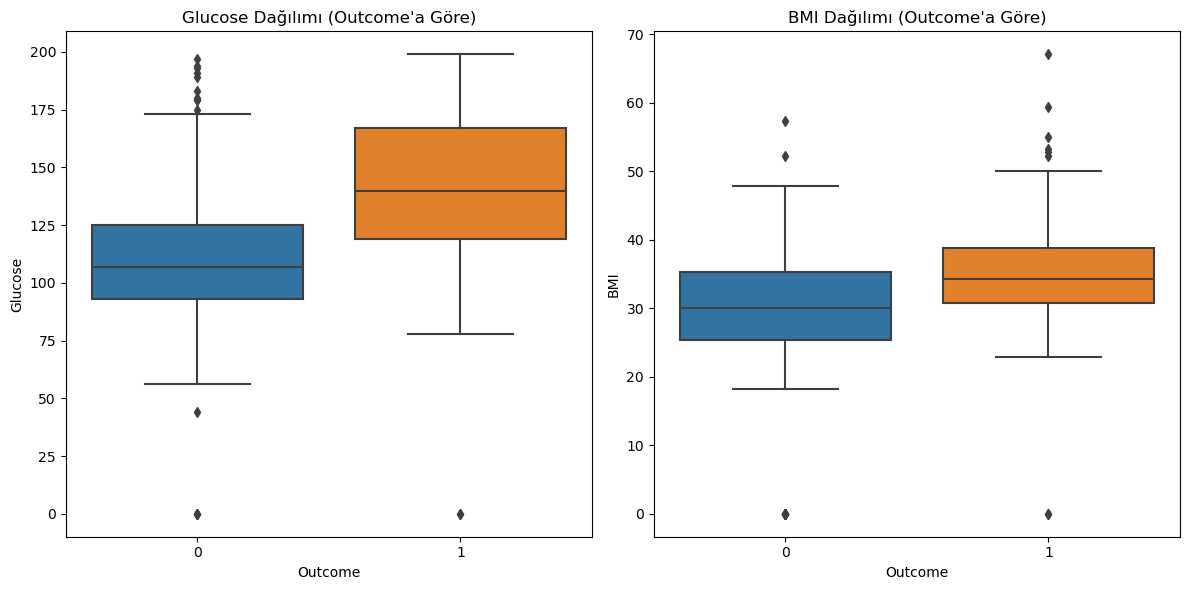

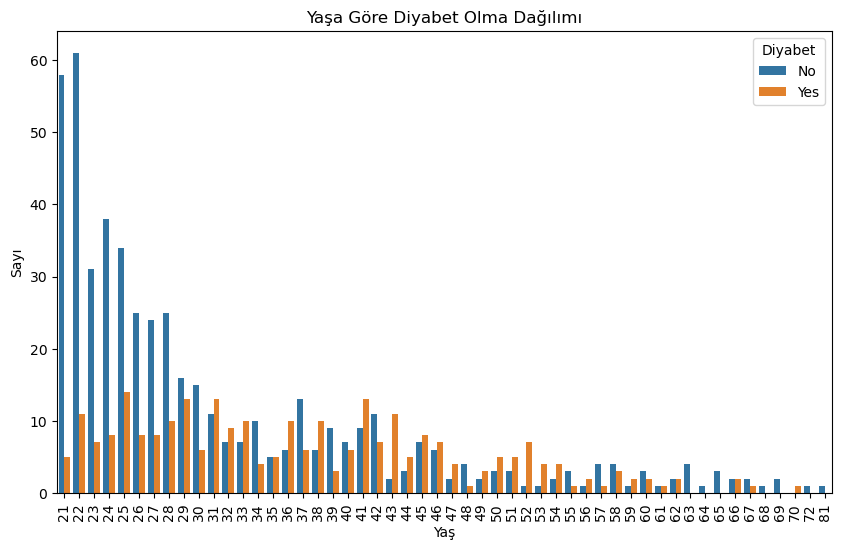

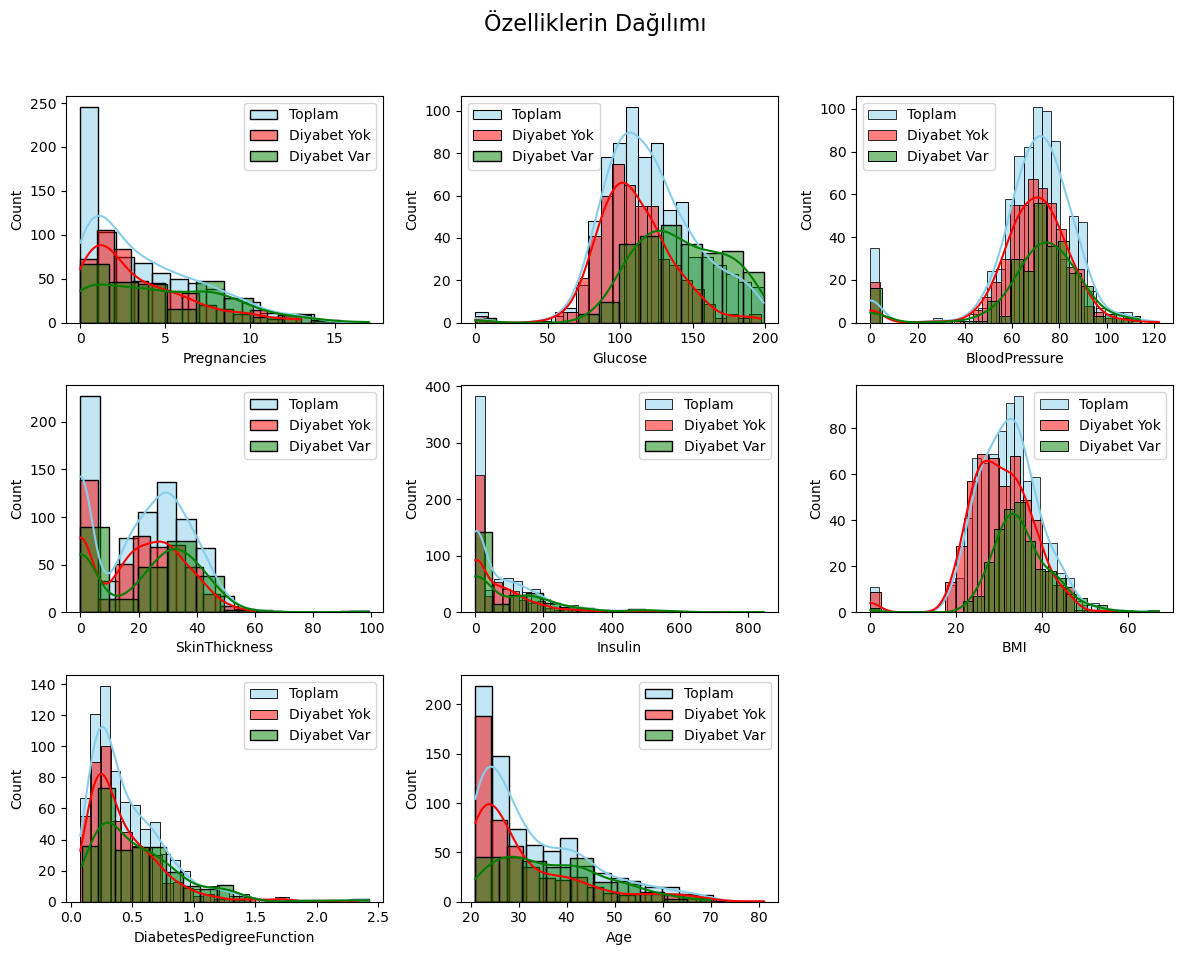

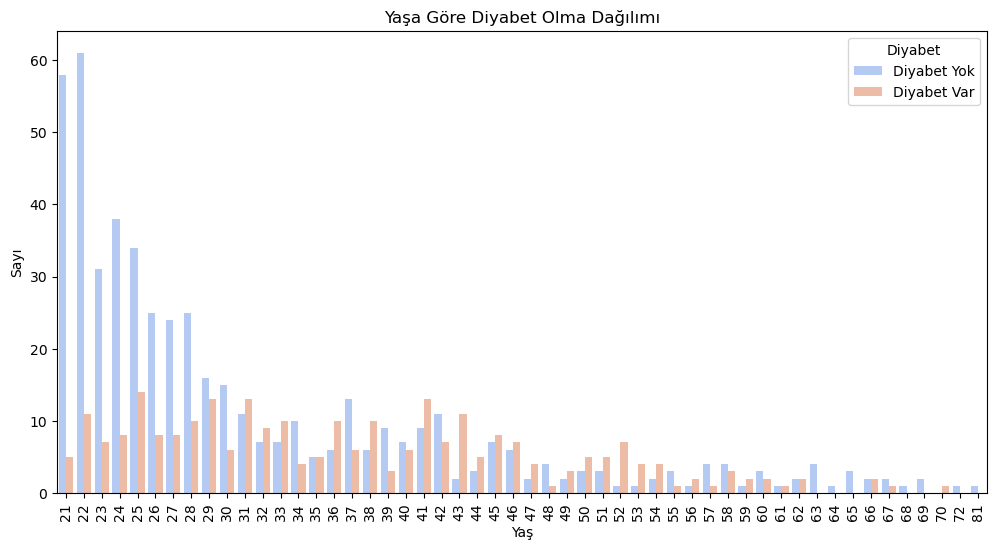

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


veri_seti = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

# Korelasyon matris
korelasyon_matrisi = veri_seti.corr()


mask = np.triu(np.ones_like(korelasyon_matrisi, dtype=bool))

# Korelasyon matrisini üçgen formda çizdirildi
plt.figure(figsize=(10, 8))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', mask=mask)
plt.title("Özelliklerin Korelasyon Matrisi")
plt.show()
#-------------------------------------------------


# Veri setinin başı
print(veri_seti.head())

# Histogram ile özelliklerin dağılımı
veri_seti.hist(figsize=(10, 10), bins=20)
plt.suptitle("Özelliklerin Dağılımı", fontsize=16)
plt.show()

# Outcome'a göre Glucose ve BMI özelliklerinin kutu grafiği ile görselleştirilmesi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Outcome', y='Glucose', data=veri_seti)
plt.title("Glucose Dağılımı (Outcome'a Göre)")

plt.subplot(1, 2, 2)
sns.boxplot(x='Outcome', y='BMI', data=veri_seti)
plt.title("BMI Dağılımı (Outcome'a Göre)")

plt.tight_layout()
plt.show()

# Yaşa göre Diyabet olma dağılımını çubuk grafiği ile görselleştrilmesi
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Outcome', data=veri_seti)
plt.title("Yaşa Göre Diyabet Olma Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Sayı")
plt.legend(title='Diyabet', labels=['No', 'Yes'])
plt.xticks(rotation=90)
plt.show()
#----------------------------------------------
plt.figure(figsize=(12, 10))
plt.suptitle("Özelliklerin Dağılımı", fontsize=16)

for i, col in enumerate(veri_seti.drop('Outcome', axis=1).columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(veri_seti[col], kde=True, color='skyblue', label='Toplam')
    sns.histplot(veri_seti.loc[veri_seti['Outcome'] == 0, col], kde=True, color='red', label='Diyabet Yok')
    sns.histplot(veri_seti.loc[veri_seti['Outcome'] == 1, col], kde=True, color='green', label='Diyabet Var')
    plt.xlabel(col)
    plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Yaşa göre Diyabet olma dağılımını çubuk grafiği ile görselleştirilmesi
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Outcome', data=veri_seti, palette='coolwarm')
plt.title("Yaşa Göre Diyabet Olma Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Sayı")
plt.legend(title='Diyabet', labels=['Diyabet Yok', 'Diyabet Var'])
plt.xticks(rotation=90)
plt.show()